In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import numpy as np  

In [24]:
# Load the data
df = pd.read_csv('../data/benin-malanville.csv')

In [ ]:
# Basic stats (row count,std,mean, min, max,and the percentiles) for numeric columns.
df.describe()



,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [32]:
#structural summary  for df.info() 
df.info()
#Additional summary of COLUMN WITH >5% missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values/len(df))*100
missing_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
missing_summary = missing_summary[missing_summary['Percentage'] > 5]
#print the summary
print("Missing values",missing_summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

In [19]:
#FROM THE ABOVE WE CAN SEE THAT COMMENT IS EMPTY FOR ALL THE ROWS(100% NULL) 
#AND THE COLUMN IS NOT NEEDED FOR OUR ANALYSIS THEREFORE WE DROP IT
df.drop(columns=['Comments'], inplace=True)
print("Shape after dropping:", df.shape)  # Should show (525600, 18) now

Shape after dropping: (525600, 18)


In [30]:
#check for duplicates
df.duplicated().sum() 

np.int64(0)

In [31]:
# Convert timestamp if needed
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Check time range and frequency
print("Date range:", df['Timestamp'].min(), "to", df['Timestamp'].max())
print("Time frequency:", pd.infer_freq(df['Timestamp']))

Date range: 2021-08-09 00:01:00 to 2022-08-09 00:00:00
Time frequency: min


<Axes: xlabel='Timestamp'>

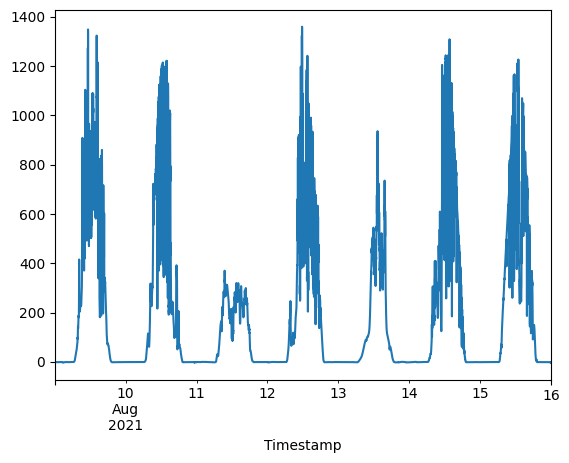

In [ ]:
#show GHI variation of first week 

df.set_index('Timestamp')['GHI'].iloc[:10080].plot()